Mínimo encontrado en x = -3.790000000000026, y = -3.2900000000000365
Valor de la función: 0.0066536200000382045
Mínimo encontrado en x = -2.7999999999999843, y = 3.1199999999999775
Valor de la función: 0.005903360000025415
Mínimo encontrado en x = 3.0099999999999794, y = 1.9800000000000009
Valor de la función: 0.006452169999992478
Mínimo encontrado en x = 3.579999999999967, y = -1.8699999999999999
Valor de la función: 0.008786570000019912


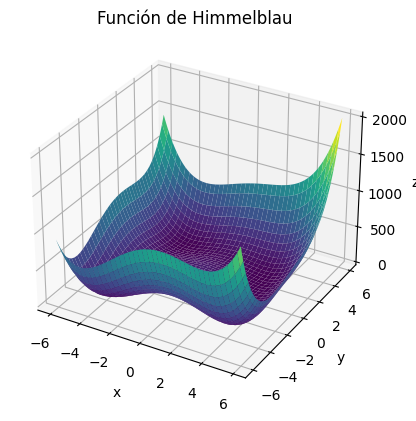

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def a_estrella_himmelblau(inicio_x, inicio_y, objetivo_z, paso, max_iteraciones):
    # Función de Himmelblau
    def f(x, y):
        return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

    # Heurística (distancia al valor objetivo)
    def h(x, y):
        return abs(f(x, y) - objetivo_z)

    # Nodo inicial
    inicio = (inicio_x, inicio_y)
    f_inicio = f(inicio_x, inicio_y)

    # Lista abierta y cerrada
    abierta = [(f_inicio, 0, h(inicio_x, inicio_y), inicio)]
    cerrada = set()

    for _ in range(max_iteraciones):
        if not abierta:
            return None  # No se encontró solución

        # Obtener el nodo con menor f = g + h
        actual_f, actual_g, actual_h, (actual_x, actual_y) = min(abierta)
        abierta.remove((actual_f, actual_g, actual_h, (actual_x, actual_y)))

        # Verificar si hemos alcanzado el objetivo
        if abs(actual_f - objetivo_z) < 1e-2:
            return (actual_x, actual_y)

        cerrada.add((actual_x, actual_y))

        # Generar vecinos
        for dx, dy in [(paso, 0), (-paso, 0), (0, paso), (0, -paso)]:
            vecino_x, vecino_y = actual_x + dx, actual_y + dy
            if (vecino_x, vecino_y) in cerrada:
                continue

            vecino_g = actual_g + paso
            vecino_h = h(vecino_x, vecino_y)
            vecino_f = f(vecino_x, vecino_y)

            for i, (_, g, _, (x, y)) in enumerate(abierta):
                if (x, y) == (vecino_x, vecino_y):
                    if g <= vecino_g:
                        break
                    del abierta[i]
                    continue
            else:
                abierta.append((vecino_f, vecino_g, vecino_h, (vecino_x, vecino_y)))

    return None  # No se encontró solución en las iteraciones máximas

# Uso del algoritmo
inicio_x, inicio_y = -5, -5
objetivo_z = 0  # Buscamos el mínimo global
paso = 0.01
max_iteraciones = 10000

resultado = a_estrella_himmelblau(inicio_x, inicio_y, objetivo_z, paso, max_iteraciones)

if resultado:
    x, y = resultado
    print(f"Mínimo encontrado en x = {x}, y = {y}")
    print(f"Valor de la función: {(x**2 + y - 11)**2 + (x + y**2 - 7)**2}")
else:
    print("No se encontró una solución")

inicio_x, inicio_y = 0, 0
objetivo_z = 0  # Buscamos el mínimo global
paso = 0.01
max_iteraciones = 10000

resultado = a_estrella_himmelblau(inicio_x, inicio_y, objetivo_z, paso, max_iteraciones)

if resultado:
    x, y = resultado
    print(f"Mínimo encontrado en x = {x}, y = {y}")
    print(f"Valor de la función: {(x**2 + y - 11)**2 + (x + y**2 - 7)**2}")
else:
    print("No se encontró una solución")


inicio_x, inicio_y = 1, 1
objetivo_z = 0  # Buscamos el mínimo global
paso = 0.01
max_iteraciones = 10000

resultado = a_estrella_himmelblau(inicio_x, inicio_y, objetivo_z, paso, max_iteraciones)

if resultado:
    x, y = resultado
    print(f"Mínimo encontrado en x = {x}, y = {y}")
    print(f"Valor de la función: {(x**2 + y - 11)**2 + (x + y**2 - 7)**2}")
else:
    print("No se encontró una solución")

inicio_x, inicio_y = 1, -2
objetivo_z = 0  # Buscamos el mínimo global
paso = 0.01
max_iteraciones = 10000

resultado = a_estrella_himmelblau(inicio_x, inicio_y, objetivo_z, paso, max_iteraciones)

if resultado:
    x, y = resultado
    print(f"Mínimo encontrado en x = {x}, y = {y}")
    print(f"Valor de la función: {(x**2 + y - 11)**2 + (x + y**2 - 7)**2}")
else:
    print("No se encontró una solución")


# Crea la malla de puntos para la gráfica
x = np.arange(-6, 6, 0.1)
y = np.arange(-6, 6, 0.1)
X, Y = np.meshgrid(x, y)
Z = himmelblau(X, Y)

# Crea la figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grafica la función de Himmelblau
ax.plot_surface(X, Y, Z, cmap='viridis')

# Configura los ejes y el título
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Función de Himmelblau')

# Muestra la gráfica
plt.show()